# <center> <h2>How to Clean and Manipulate Data with Pandas</h2> </center> 

---
Author: Maxime & Lucas <br /> 
Date: 27/10/2020

--- 
Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language

We will use the csv file: https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4928126-tp-nettoyez-votre-jeu-de-donnees. We will have a straightforward approach on how to manipulate/clean this dataset. However, I encourage you to check the open classroom tuto for a more  advanced approach. 


## Context
The csv file contains different information such as:
- name 
- mail 
- birth date
- country 
- height 

We will see that there are some problems with this dataset. Our goal is to clean it by using pandas library. We will clean each column separately using simple functions and methods built within Pandas.  <br /> 
Moreover, to go further we will generate (randomly) a weight column that we will use to perform BMI calculation.  <br /> 
Lastly we will see how to make a simple visualisation to determine whose BMI is not normal. And we will use aggregation to return their email and BMI.  <br /> 

## Concepts
1. Importing csv file 
2. Data cleaning 
3. Pandas basic operations
4. Data visualisation 


## Packages that can be useful 
- Pandas : https://pandas.pydata.org/docs/
- Numpy : https://numpy.org/doc/
- regex : https://docs.python.org/3/library/re.html
- Matplotlib : https://matplotlib.org/








 
 
 
 


In [1]:
#Importing packages used 
import pandas as pd 
import numpy as np 
import re 
import matplotlib.pyplot as plt 

# 1. Importing the csv file 

- To import a csv file you just need to use the ***read_csv()*** function followed by the name of your file.  <br /> 
- The ***dtpypes***  is a useful attribute to know the format type of each column of your dataframe <br /> 
- We will prefer using ***display*** than ***print*** for a dataframe.

In [2]:
dataframe = pd.read_csv("personnes.csv")
display(dataframe)
print(dataframe.dtypes)

#We are creating a new dataframe to store the new values
#We just want to keep the original one to be able to compare it later
clean_dataframe = pd.DataFrame()

,prenom,email,date_naissance,pays,taille
0,Leila,leila@example.com,23/01/1990,France,1.49m
1,Samuel,samuel_329@example.com,20/09/2001,NaN,1.67m
2,Radia,choupipoune@supermail.eu,12 sept. 1984,Côte d'ivoire,153cm
3,Marc,"marco23@example.com, mc23@supermail.eu",10/02/1978,France,1.65m
4,Heri,helloworld@supermail.eu,05/03/2008,Madagascar,1.34m
5,Hanna,hanna2019@supermail.eu,01/01/1970,24,3.45m
6,samuël,samuel_329@example.com,NaN,Bénin,1.45m


prenom            object
email             object
date_naissance    object
pays              object
taille            object
dtype: object


## <ins>Note</ins>
You can see many problems that occur in this dataframe such as <mark>string formating</mark> or the <mark>type of some </mark>variables



# 2. Data Cleaning 


## <blockquote>A. The "prenom" column.</blockquote>

 
<ins> Reminder </ins>: Python is ***case sensitive***. Therefore Samuel and samuël are seen as distinct values. <br />

We want each name to start with an uppercase and remove all specials charaters. <br />
- To do so we first need to transform the type of the column into a string using ***.str***
- finaly we use the ***replace*** and the ***capilatize*** function 


In [3]:
#using the type method to see the different types
print(type(dataframe["prenom"]))
print(type(dataframe["prenom"].str))

clean_dataframe["prenom"] = dataframe["prenom"].str.replace("ë","e").str.capitalize()
clean_dataframe

<class 'pandas.core.series.Series'>
<class 'pandas.core.strings.StringMethods'>


,prenom
0,Leila
1,Samuel
2,Radia
3,Marc
4,Heri
5,Hanna
6,Samuel


## <blockquote>B. The "email" column.</blockquote>

We noticed that someone put 2 mails. We are going to deal with this problem by:  
- 1. separating each mail of each cell by a "," using ***split***
- 2. create a new list where we will store the mails we want 
- 3. using a ***for loop*** to catch each mail at the 1st position and store it in the new list 

The ***method 2*** is doing the same thing using list comprehension

In [4]:
liste_mail = dataframe["email"].str.split(",")

clean_email = []
for mail in liste_mail : 
    clean_email.append(mail[0])
clean_dataframe["email"] = clean_email

#method 2 
"""
clean_dataframe["email"] = [mail[0] for mail in dataframe["email"].str.split(",")]
"""

clean_dataframe

,prenom,email
0,Leila,leila@example.com
1,Samuel,samuel_329@example.com
2,Radia,choupipoune@supermail.eu
3,Marc,marco23@example.com
4,Heri,helloworld@supermail.eu
5,Hanna,hanna2019@supermail.eu
6,Samuel,samuel_329@example.com


## <blockquote>C. The "date_naissance" column.</blockquote> 

If we refer to the ***dtype()*** attributes we run earlier we notice that  date is an ***object*** type.  <br />
However, a birth date should be in a date format. <br />
Pandas embark a function that enables to transform directly the values into a date type : ***to datetime()***<br />

You can change the format of the date. Refer to the ***pd.datetime()*** in the Pandas documentation

In [5]:
#pandas intègre une fonction qui permet de changer directement certains objet en date type 
clean_dataframe["date_naissance"] = pd.to_datetime(dataframe["date_naissance"])
display(clean_dataframe)
print("\n")
print(clean_dataframe["date_naissance"].dtypes)

,prenom,email,date_naissance
0,Leila,leila@example.com,1990-01-23
1,Samuel,samuel_329@example.com,2001-09-20
2,Radia,choupipoune@supermail.eu,1984-09-12
3,Marc,marco23@example.com,1978-10-02
4,Heri,helloworld@supermail.eu,2008-05-03
5,Hanna,hanna2019@supermail.eu,1970-01-01
6,Samuel,samuel_329@example.com,NaT




datetime64[ns]


## <blockquote>D. The "pays" column.</blockquote> 

Let's check if there are any problems for the country column. <br />
A simple way to do this can be by returning each unique value present in the columns. We can do that by using ***unique()***<br />



In [6]:
for pays in dataframe["pays"].unique() : 
    print(pays)

France
nan
Côte d'ivoire
Madagascar
24
Bénin


We can see that there is a "weird" value, "24". <br/>
We will remplace it by "nan"

In [7]:
clean_dataframe["pays"]=dataframe["pays"].replace("24", np.nan)
clean_dataframe

,prenom,email,date_naissance,pays
0,Leila,leila@example.com,1990-01-23,France
1,Samuel,samuel_329@example.com,2001-09-20,NaN
2,Radia,choupipoune@supermail.eu,1984-09-12,Côte d'ivoire
3,Marc,marco23@example.com,1978-10-02,France
4,Heri,helloworld@supermail.eu,2008-05-03,Madagascar
5,Hanna,hanna2019@supermail.eu,1970-01-01,NaN
6,Samuel,samuel_329@example.com,NaT,Bénin


## <blockquote>E. The "taille" column.</blockquote> 

For the last column, we notice 2 problems. 
- 1. different scales are use cm and m 
- 2. heights are object types. 

We going to use the same approach that we did for the mails. 
- 1. create a new list to store the clean values 
- 2. use a for loop to go through each value
- 3. use ***re.sub()*** to remove characters 
- 4. store the new list in a column
- 5. change the type using ***astype()*** 

In [8]:
taille_cm = []
for taille in dataframe["taille"] : 
    clean_height = re.sub("[.,m,c]","",taille)
    taille_cm.append(clean_height)


clean_dataframe["taille"] = taille_cm

 
clean_dataframe["taille"] = clean_dataframe["taille"].astype(int)

## Now that we cleaned the data we can see the difference 

In [9]:
display(clean_dataframe)
print(clean_dataframe.dtypes)
display(dataframe)
print(dataframe.dtypes)

,prenom,email,date_naissance,pays,taille
0,Leila,leila@example.com,1990-01-23,France,149
1,Samuel,samuel_329@example.com,2001-09-20,NaN,167
2,Radia,choupipoune@supermail.eu,1984-09-12,Côte d'ivoire,153
3,Marc,marco23@example.com,1978-10-02,France,165
4,Heri,helloworld@supermail.eu,2008-05-03,Madagascar,134
5,Hanna,hanna2019@supermail.eu,1970-01-01,NaN,345
6,Samuel,samuel_329@example.com,NaT,Bénin,145


prenom                    object
email                     object
date_naissance    datetime64[ns]
pays                      object
taille                     int32
dtype: object


,prenom,email,date_naissance,pays,taille
0,Leila,leila@example.com,23/01/1990,France,1.49m
1,Samuel,samuel_329@example.com,20/09/2001,NaN,1.67m
2,Radia,choupipoune@supermail.eu,12 sept. 1984,Côte d'ivoire,153cm
3,Marc,"marco23@example.com, mc23@supermail.eu",10/02/1978,France,1.65m
4,Heri,helloworld@supermail.eu,05/03/2008,Madagascar,1.34m
5,Hanna,hanna2019@supermail.eu,01/01/1970,24,3.45m
6,samuël,samuel_329@example.com,NaN,Bénin,1.45m


prenom            object
email             object
date_naissance    object
pays              object
taille            object
dtype: object


# 3. Pandas basic 

Here is a list of basic thinds you can do with pandas 

In [10]:
print("shape of the data frame : " + str(clean_dataframe.shape))
print("row information : " + str(clean_dataframe.index))
print("the columns : " + str(clean_dataframe.columns))
print("\n")
print("how to find how many the sum of nan values you have")
print(clean_dataframe.isnull().sum())
print("\n")
print("basic statistics")
clean_dataframe.describe()

shape of the data frame : (7, 5)
row information : RangeIndex(start=0, stop=7, step=1)
the columns : Index(['prenom', 'email', 'date_naissance', 'pays', 'taille'], dtype='object')


how to find how many the sum of nan values you have
prenom            0
email             0
date_naissance    1
pays              2
taille            0
dtype: int64


basic statistics


,taille
count,7.000000
mean,179.714286
std,73.767008
min,134.000000
25%,147.000000
50%,153.000000
75%,166.000000
max,345.000000


<ins> Note </ins>: using ***describe*** helps us have basic statistics. We can see that there is an anormal value with the height column </br>


In [11]:
clean_dataframe["taille"] = clean_dataframe["taille"].replace(345,np.nan)
clean_dataframe

,prenom,email,date_naissance,pays,taille
0,Leila,leila@example.com,1990-01-23,France,149.0
1,Samuel,samuel_329@example.com,2001-09-20,NaN,167.0
2,Radia,choupipoune@supermail.eu,1984-09-12,Côte d'ivoire,153.0
3,Marc,marco23@example.com,1978-10-02,France,165.0
4,Heri,helloworld@supermail.eu,2008-05-03,Madagascar,134.0
5,Hanna,hanna2019@supermail.eu,1970-01-01,NaN,NaN
6,Samuel,samuel_329@example.com,NaT,Bénin,145.0


## At this point we will generate random weights values to keep manipulate a bit more our dataframe. 

In [12]:
#we use "seed" to keep the same set randomly generate
np.random.seed(300)
poids = np.round(np.random.normal(55,5,7),2)
poids

array([47.57, 53.7 , 47.88, 50.54, 58.81, 51.51, 53.02])

In [13]:
#we just add the column to the data weight 
clean_dataframe["poids"] = poids

We can see here that making operations between columns is straightforward. </br>

Here we are calculating the BMI (Body mass index) and we create the column <br/>
BMI = kg/m²

In [14]:
taille_m = clean_dataframe["taille"]/100
clean_dataframe["IMC"] = clean_dataframe["poids"]/(taille_m**2)

In [15]:
clean_dataframe

,prenom,email,date_naissance,pays,taille,poids,IMC
0,Leila,leila@example.com,1990-01-23,France,149.0,47.57,21.426963
1,Samuel,samuel_329@example.com,2001-09-20,NaN,167.0,53.70,19.254903
2,Radia,choupipoune@supermail.eu,1984-09-12,Côte d'ivoire,153.0,47.88,20.453672
3,Marc,marco23@example.com,1978-10-02,France,165.0,50.54,18.563820
4,Heri,helloworld@supermail.eu,2008-05-03,Madagascar,134.0,58.81,32.752283
5,Hanna,hanna2019@supermail.eu,1970-01-01,NaN,NaN,51.51,NaN
6,Samuel,samuel_329@example.com,NaT,Bénin,145.0,53.02,25.217598


# Data visualisation

Once your data is clean and that all the things you want are inside your dataframe. You can make visualisation directly from your data frame. <br /> 
Our goal here will be to make a visualisation to find who has abnormal BMI (<18 or >25)(thank you wikipedia). <br /> 

We will use ***matplotlib***. 

- We begin by creating the object that will have our visualisation 
- We use a horizontal diagram to visualise the IMC according to the name
- We set the limits 18 and 25 
- We add some labels 
- We plot the visualisation 



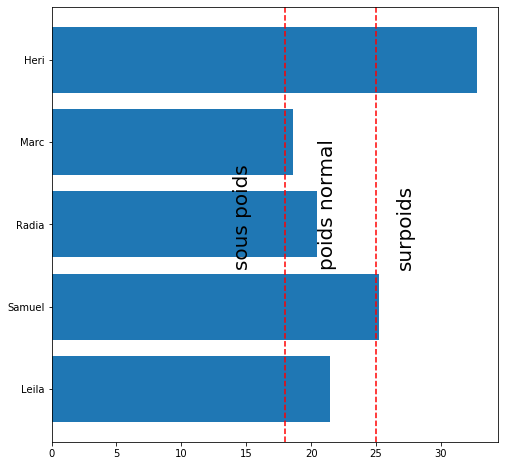

In [16]:

#on délare le graphique
fig, ax = plt.subplots(figsize=(8,8))
#diagramme horizontal
ax.barh(clean_dataframe["prenom"],clean_dataframe["IMC"])
#on fixe les limites 
ax.axvline(25, ls = '--', color ='r')
ax.axvline(18, ls = '--', color ='r')

#on entre la légende 
plt.text(14,1.5,'sous poids',rotation = 90,fontsize = 20)
plt.text(20.5,1.5,'poids normal',rotation = 90,fontsize = 20)
plt.text(26.5,1.5,'surpoids',rotation = 90,fontsize = 20)


plt.show()